In [26]:
import xarray as xr
import numpy as np
# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import sys
from netCDF4 import Dataset
from pprint import pprint, pp
import pandas as pd

In [11]:
data = xr.open_mfdataset( 'I:\Asia_Pacific_NO2\S5P_TROPOMI_NO2_Tropospheric_column_number_density\S5P_Tropospheric_NO2_column_number_density_20*.nc')
#                          combine='nested', concat_dim='time', parallel=True )

In [12]:
daily = data.resample(time='D').mean()

In [13]:
daily

<xarray.Dataset>
Dimensions:                                 (y: 673, x: 836, time: 1763)
Coordinates:
  * y                                       (y) float64 46.58 46.49 ... -13.79
  * x                                       (x) float64 58.97 59.06 ... 134.0
  * time                                    (time) datetime64[ns] 2018-06-28 ...
Data variables:
    tropospheric_NO2_column_number_density  (time, y, x) float64 dask.array<chunksize=(1, 673, 836), meta=np.ndarray>

In [34]:
days3 =  daily.tropospheric_NO2_column_number_density[0:3]

ValueError: Unsupported key-type <class 'slice'>

In [36]:
days = days3.mean()

In [37]:
days

<xarray.DataArray 'tropospheric_NO2_column_number_density' ()>
dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

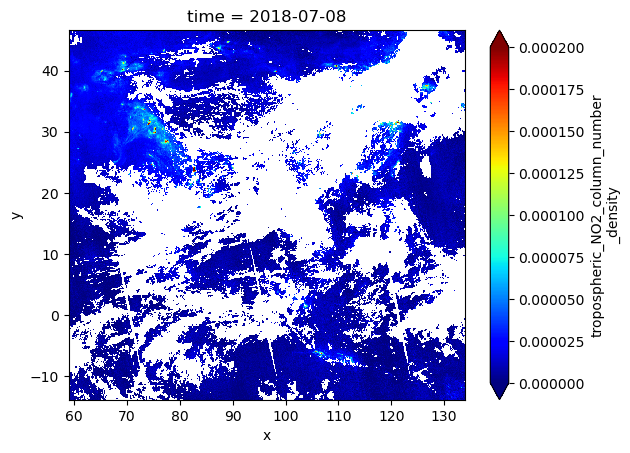

In [24]:
daily.tropospheric_NO2_column_number_density[10].plot(cmap='jet',vmin =0,vmax = 0.0002)

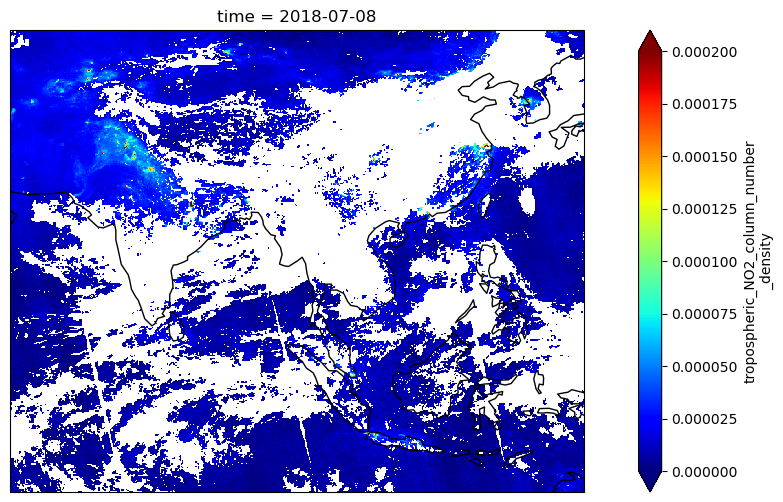

In [30]:
import cartopy.crs as ccrs
plt.figure(figsize=(14,6))
ax = plt.axes(projection = ccrs.PlateCarree())

daily.tropospheric_NO2_column_number_density[10].plot.pcolormesh(ax=ax, x='x', 
                                                 y='y',
                                                 add_colorbar=True, 
                                                                 cmap='jet',
                                                                 vmin =0,
                                                                 vmax = 0.0002)

ax.set_extent([59,134,-11,40])  #ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.coastlines();